In [5]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import os

In [7]:
os.chdir("/Users/radek/PycharmProjects/pythonProject")

In [8]:
X = pd.read_csv(os.path.join('data','train_data.csv'), header=None)
y = pd.read_csv(os.path.join('data','train_labels.csv'), header=None, names=['y'])
y = y['y'].apply(lambda x: 1 if x == -1 else 0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [11]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.800153 (0.023007)
LDA: 0.897938 (0.003182)
KNN: 0.956961 (0.013563)
CART: 0.940971 (0.014588)
NB: 0.900072 (0.000975)
SVM: 0.900072 (0.000975)


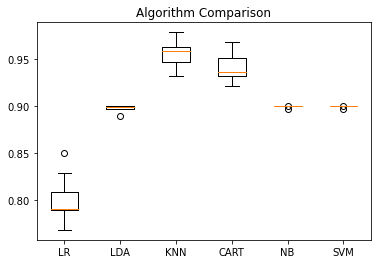

In [12]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [15]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [16]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9552238805970149
[[823  21]
 [ 21  73]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       844
           1       0.78      0.78      0.78        94

    accuracy                           0.96       938
   macro avg       0.88      0.88      0.88       938
weighted avg       0.96      0.96      0.96       938

